<a href="https://colab.research.google.com/github/dspuliaiev/Data_Science/blob/master/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [273]:
# Завантажуємо дані датасету
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [274]:
# Нормалізуємо дані датасету (приводимо дані у діапазон значень з 0 до 1)
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train/255.0, x_test/255.0

In [275]:
# Розділяємо тренувальні дані на навчальні та валідаційні
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

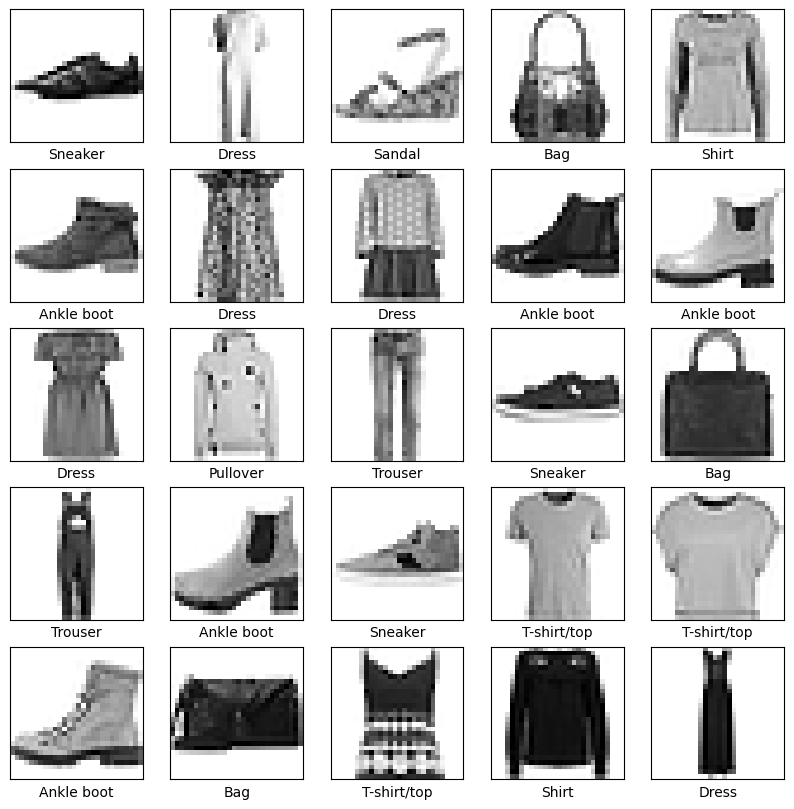

In [276]:
# Візуалізуємо декілько прикладів з датасету
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [277]:
# Створюємо модель

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [278]:
# Компілюємо модель

model.compile(optimizer=Adam(0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [279]:
# Визначаємо ранню зупинку та зниження швидкості для запобіганню перенавчанню

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [280]:
# Навчаємо модель

history = model.fit(x_train, y_train, batch_size=64,
                    epochs=50, validation_data=(x_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
750/750 [==============================] - 17s 19ms/step - loss: 2.3104 - accuracy: 0.6350 - val_loss: 1.6923 - val_accuracy: 0.8153 - lr: 1.0000e-04
Epoch 2/50
750/750 [==============================] - 14s 18ms/step - loss: 1.7994 - accuracy: 0.7758 - val_loss: 1.5503 - val_accuracy: 0.8362 - lr: 1.0000e-04
Epoch 3/50
750/750 [==============================] - 13s 17ms/step - loss: 1.6392 - accuracy: 0.8084 - val_loss: 1.4391 - val_accuracy: 0.8536 - lr: 1.0000e-04
Epoch 4/50
750/750 [==============================] - 12s 16ms/step - loss: 1.5248 - accuracy: 0.8213 - val_loss: 1.3567 - val_accuracy: 0.8602 - lr: 1.0000e-04
Epoch 5/50
750/750 [==============================] - 12s 17ms/step - loss: 1.4181 - accuracy: 0.8354 - val_loss: 1.2880 - val_accuracy: 0.8613 - lr: 1.0000e-04
Epoch 6/50
750/750 [==============================] - 14s 18ms/step - loss: 1.3277 - accuracy: 0.8441 - val_loss: 1.1903 - val_accuracy: 0.8715 - lr: 1.0000e-04
Epoch 7/50
750/750 [==============

In [287]:
# Оцінюємо модель

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc * 100:.1f}%')

313/313 [==============================] - 3s 10ms/step - loss: 0.4361 - accuracy: 0.8946

Test accuracy: 89.5%


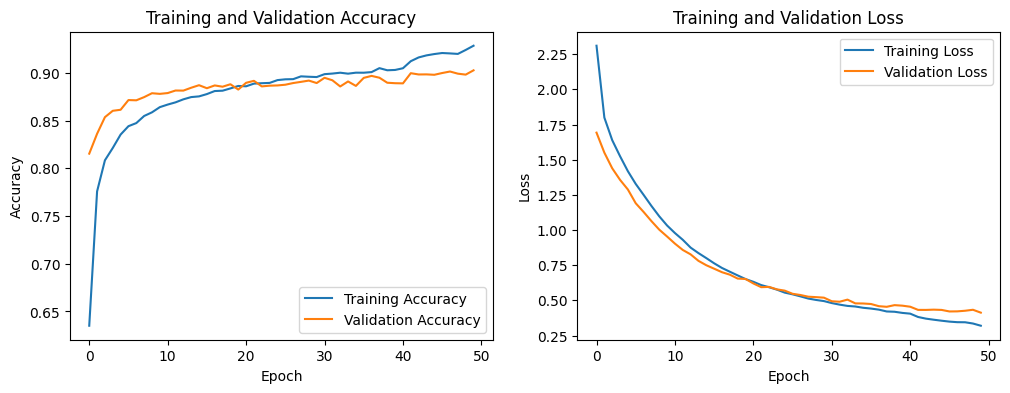

In [282]:
# Візуалізуємо точність та втрату на тренувальному та валідаційному наборах даних

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

313/313 [==============================] - 1s 4ms/step


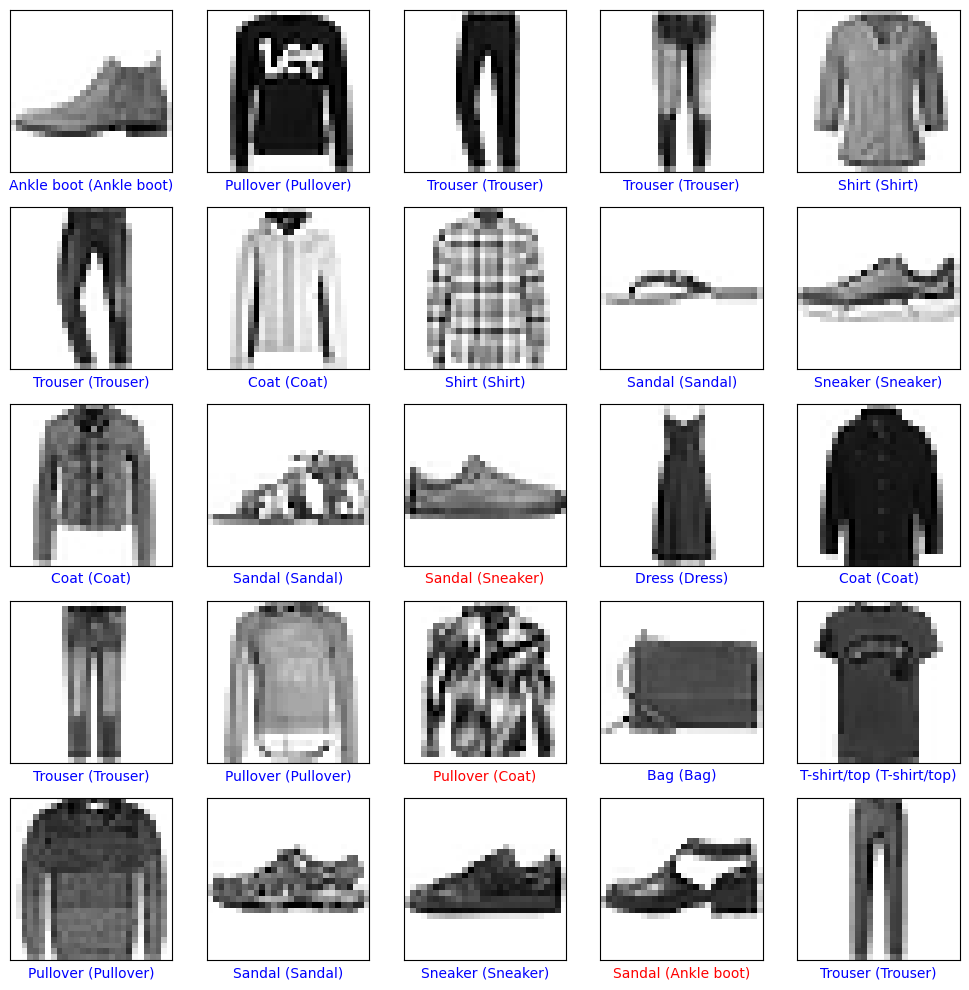

In [285]:
# Прогнозуємо класи для тестових даних
predictions = model.predict(x_test)

# Перетворюємо прогнози на мітки класів
predicted_classes = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Візуалізація кількох зображень із тестового набору даних із передбаченими та дійсними мітками класів
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                class_names[true_label]),
                                color=color)

# Передбачення перших 25 зображень із тестового набору даних
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()
